In [53]:
import pandas as pd
import os
from collections import Counter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [12]:
train_data_dir = 'data/train'
custom_train_data_dir = 'data/custom_train'
train_labels_path = "data/train.csv"

In [13]:
train_df = pd.read_csv(train_labels_path)
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [68]:
def import_labels(label_path):
    """ This function import labels from csv / Create a list of unique
    labels and a dict with image_name and its label
    Output : dict('image_name': 'label')
    """
    labels_df = pd.read_csv(label_path)
    dict_labels = labels_df.set_index('Image').to_dict()['Id']
    unique_labels = sorted(list(set(dict_labels.values())))
    return dict_labels, unique_labels
dict_labels, unique_labels = import_labels(train_labels_path)

In [60]:
labels_count = train_df['Id'].value_counts()
labels_count_list = labels_count.tolist()
labels_count.head()

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
Name: Id, dtype: int64

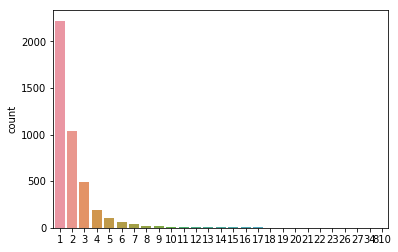

In [61]:
sns.countplot(labels_count_list)
plt.show()

In [55]:
statistics.mean(labels_count_list)

2.1270588235294117

In [16]:
def count_elements(folder):
    i = 0
    for element in os.listdir(folder):
        i += 1
    return i

In [75]:
count_elements(train_data_dir)

9850

In [74]:
count_elements(custom_train_data_dir)

5562

In [72]:
def remove_elements(folder, nb_labels_max):
    for element in os.listdir(folder):
        label = dict_labels[element]
        if labels_count[label] <= 2:
            os.remove(folder + '/' + element)

In [73]:
remove_elements(custom_train_data_dir, 2)